In [1]:
from normal_equation import normal_equation
from gradient_descent import gradient_descent
from polynomial_features import polynomial_features
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Generating small set of data with Gaussian noise added

In [2]:
x = 10 * np.random.rand(100, 1)
y = 5 + 3 * x + np.random.randn(100, 1)

Let's show generated data

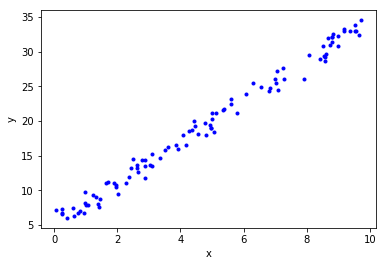

In [3]:
plt.plot(x, y, 'b.')
plt.xlabel("x")
plt.ylabel("y")
plt.show()

## Let's use Normal Equation

In [4]:
theta_best = normal_equation(x, y)

Normal Equation is given by the formula
\begin{align}
\mathbf{w} = (X^T X)^{-1} X^T \mathbf{y}
\end{align}


Now we choose two points to draw the line given by Normal Equation

In [5]:
x_test = np.array([0, 10])
x_test_biased = np.c_[np.ones((len(x_test), 1)), x_test]
y_predict = x_test_biased.dot(theta_best)
y_predict

array([[ 5.27559391],
       [34.64742159]])

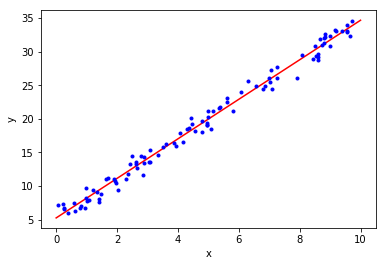

In [6]:
plt.plot(x_test, y_predict, "r-")
plt.plot(x, y, "b.")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

## Let's use Gradient Descent

In [7]:
theta_best_gdsc = gradient_descent(x, y, learning_rate=0.01, number_of_iter=1000)
y_predict_gdsc = x_test_biased.dot(theta_best_gdsc)
y_predict_gdsc

array([[ 4.91671149],
       [34.836081  ]])

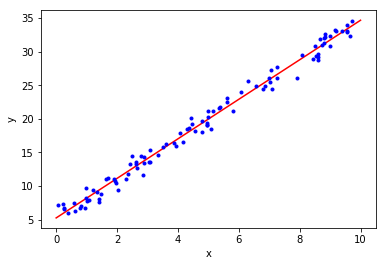

In [8]:
plt.plot(x_test, y_predict, "r-")
plt.plot(x, y, "b.")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

Let's try finding best parameters for Gradient Descent 

In [9]:
thetas = []
for index, learning_rate in enumerate([np.round(0.1**i, i) for i in range(2, 6)]):
    thetas.append([])
    for number_of_iter in [10**i for i in range(2, 6)]:
        tmp = gradient_descent(x, y, learning_rate, number_of_iter)
        thetas[index].append([learning_rate, number_of_iter, tmp])

Let's find the best solution

In [10]:
for batch in thetas:
    print(batch)

[[0.01, 100, array([[2.28663657],
       [3.39320376]])], [0.01, 1000, array([[4.87933799],
       [2.99763897]])], [0.01, 10000, array([[5.27559391],
       [2.93718277]])], [0.01, 100000, array([[5.27559391],
       [2.93718277]])]]
[[0.001, 100, array([[-1.4296641 ],
       [ 3.80877438]])], [0.001, 1000, array([[1.36379834],
       [3.53399988]])], [0.001, 10000, array([[4.91421129],
       [2.9923184 ]])], [0.001, 100000, array([[5.27559391],
       [2.93718277]])]]
[[0.0001, 100, array([[0.04723242],
       [1.12643606]])], [0.0001, 1000, array([[-0.14943797],
       [ 3.60379033]])], [0.0001, 10000, array([[0.4260903 ],
       [3.67706467]])], [0.0001, 100000, array([[5.05123713],
       [2.97141256]])]]
[[1e-05, 100, array([[-0.32143969],
       [-0.27430602]])], [1e-05, 1000, array([[1.59063042],
       [0.01133033]])], [1e-05, 10000, array([[-0.65819016],
       [ 3.64711506]])], [1e-05, 100000, array([[1.78571698],
       [3.46962835]])]]


The amount of data is sufficiently small. That's why we will simply choose the best result, so the theta that is closest to [4, 3]. As we can see our algorithm was best for learnign_rate = 0.001 and number_of_iter = 10000

## Polynomial Regression

In [11]:
x = 6 * np.random.rand(100, 1) - 3
y = 0.5 * x ** 2 + x + 2 + np.random.randn(100, 1)

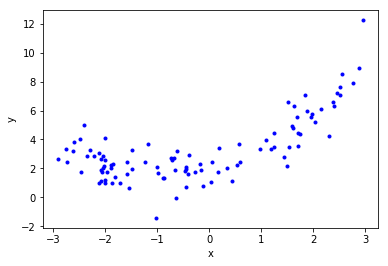

In [12]:
plt.plot(x, y, 'b.')
plt.xlabel("x")
plt.ylabel("y")
plt.show()

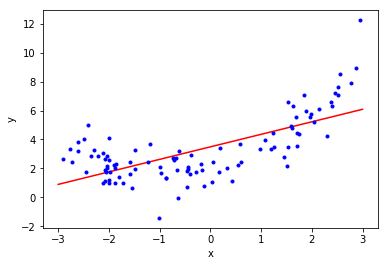

In [13]:
theta_linear = normal_equation(x, y)
x_test = np.array([[-3], [3]])
x_test_biased = np.c_[np.ones((len(x_test), 1)), x_test]
y_predict_linear = x_test_biased.dot(theta_linear)
plt.plot(x_test, y_predict_linear, "r-")
plt.plot(x, y, 'b.')
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [17]:
x_polynomial = polynomial_features(x, degree=2)
theta_polynomial = normal_equation(x_polynomial, y)

jamnik


In [18]:
x_test_polynomial = polynomial_features(np.arange(-3, 3, 0.1).reshape(-1, 1), degree=2)
x_test_polynomial_biased = np.c_[np.ones((len(x_test_polynomial), 1)), x_test_polynomial]
y_predict_polynomial = x_test_polynomial_biased.dot(theta_polynomial)

jamnik


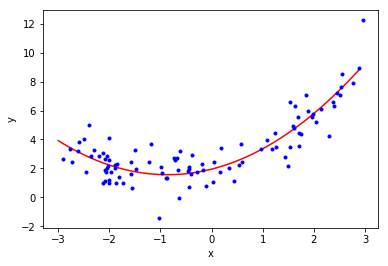

In [19]:
plt.plot(np.arange(-3, 3, 0.1), y_predict_polynomial, "r-")
plt.plot(x, y, 'b.')
plt.xlabel("x")
plt.ylabel("y")
plt.show()